In [1]:
# Load modules for data manipulation
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import call
import pandas as pd
import numpy as np
import time
import os

In [2]:
# Load modules for machine learning
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Calculate the accurancy of the model
from sklearn.metrics import accuracy_score, classification_report

# For drawing the graph
from sklearn.tree import export_graphviz

# will be used for tree visualization
from dtreeviz.trees import dtreeviz

In [3]:
load_dotenv()

True

In [4]:
# Declare the list of products for each family
# Les familles sont: CREDITS, DEPOTS MONETAIRES, PRODUITS EXTERNES COMMERCIALISES
credit = ['00568', '00943', '00942', '00546', '00547', '03992', '00940', '00941', '00548', '06458', '00509', '00565']
depot = ['07648', '07649', '07606', '00003']
comm = ['05808', '05807']

In [5]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature name logistic regressions
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + '-FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
    plt.savefig('{}.svg'.format(model_type))

In [6]:
# Get the data from the other notebook
%store -r data
%store -r cols
%store -r eco
%store -r ctr

# -------------------------------------------------------------------------------------------------------------

# Statistics

## Single

In [7]:
data.shape

(506392, 121)

### Eco

In [42]:
print(data['ECO'].value_counts())

False    346365
True     160027
Name: ECO, dtype: int64


### Sexe

In [9]:
print(data['COSEXE'].value_counts())

1    258539
0    247853
Name: COSEXE, dtype: int64


### Age

In [21]:
print('0-14 ::', data[(0 <= data['QTAGCL']) & (data['QTAGCL'] <= 14)]['COSEXE'].count())
print('15-29 ::', data[(15 <= data['QTAGCL']) & (data['QTAGCL'] <= 29)]['COSEXE'].count())
print('30-44 ::', data[(30 <= data['QTAGCL']) & (data['QTAGCL'] <= 44)]['COSEXE'].count())
print('45-59 ::', data[(45 <= data['QTAGCL']) & (data['QTAGCL'] <= 59)]['COSEXE'].count())
print('60-74 ::', data[(60 <= data['QTAGCL']) & (data['QTAGCL'] <= 74)]['COSEXE'].count())
print('75-~ ::', data[75 <= data['QTAGCL']]['COSEXE'].count())

0-14 :: 81151
15-29 :: 85360
30-44 :: 103877
45-59 :: 104705
60-74 :: 87646
75-~ :: 43653


In [15]:
pd.DataFrame(data['QTAGCL'].describe())

,QTAGCL
count,506392.000000
mean,41.771866
std,23.522707
min,0.000000
25%,23.000000
50%,42.000000
75%,60.000000
max,109.000000


In [16]:
print(data['QTAGCL'].median())
print(data['QTAGCL'].mode())

42.0
0    44.0
dtype: float64


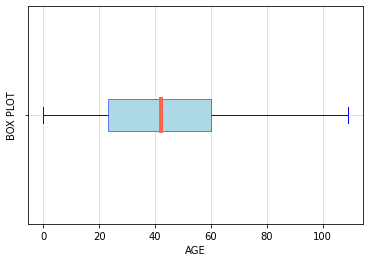

In [19]:
bp = plt.boxplot(data['QTAGCL'], vert=False, patch_artist=True)
plt.yticks([1], [''])

plt.setp(bp['caps'],color='blue',alpha=1)
plt.setp(bp['whiskers'],color='blue',alpha=1)
plt.setp(bp['medians'],color='tomato',alpha=1,linewidth=4.0)
plt.setp(bp['boxes'], color='blue', facecolor='lightblue',alpha=1,linewidth=0.5)

plt.xlabel('AGE')
plt.ylabel('BOX PLOT')

plt.grid(alpha=0.5)
plt.savefig("../graphs/age_box.png", dpi = 300)

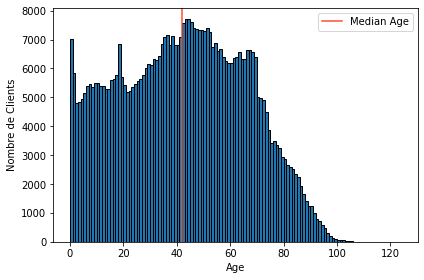

In [20]:
bins = [i for i in range(125)]
plt.hist(data['QTAGCL'], bins=bins, edgecolor='black')
plt.axvline(data['QTAGCL'].median(), color='#FC4F30', label='Median Age')

plt.xlabel('Age')
plt.ylabel('Nombre de Clients')
plt.legend()
plt.tight_layout()
plt.savefig("../graphs/age_hist.png", dpi = 300)

### CTSCPI

In [34]:
data.CTSCPI.nunique()

53

In [35]:
ctscpi = data['CTSCPI'].value_counts()
ctscpi = list(zip(ctscpi.index, ctscpi.values))

In [37]:
for temp in ctscpi:
    print('INSEE: {}, COUNT: {}, %: {:.3}.'.format(temp[0], temp[1], temp[1] / data.shape[0] * 100))

INSEE: 8400.0, COUNT: 106848, %: 21.1.
INSEE: 7600.0, COUNT: 49378, %: 9.75.
INSEE: 8500.0, COUNT: 48220, %: 9.52.
INSEE: 5400.0, COUNT: 29031, %: 5.73.
INSEE: 5200.0, COUNT: 26783, %: 5.29.
INSEE: 7300.0, COUNT: 22650, %: 4.47.
INSEE: 8600.0, COUNT: 22457, %: 4.43.
INSEE: 5500.0, COUNT: 18898, %: 3.73.
INSEE: 4200.0, COUNT: 15825, %: 3.13.
INSEE: 5600.0, COUNT: 13963, %: 2.76.
INSEE: 2300.0, COUNT: 12776, %: 2.52.
INSEE: 4300.0, COUNT: 12510, %: 2.47.
INSEE: 6300.0, COUNT: 12359, %: 2.44.
INSEE: 7200.0, COUNT: 10889, %: 2.15.
INSEE: 4600.0, COUNT: 10886, %: 2.15.
INSEE: 4700.0, COUNT: 10673, %: 2.11.
INSEE: 3700.0, COUNT: 10586, %: 2.09.
INSEE: 3400.0, COUNT: 10421, %: 2.06.
INSEE: 8100.0, COUNT: 9948, %: 1.96.
INSEE: 5300.0, COUNT: 6860, %: 1.35.
INSEE: 6200.0, COUNT: 6104, %: 1.21.
INSEE: 6400.0, COUNT: 4514, %: 0.891.
INSEE: 3300.0, COUNT: 4336, %: 0.856.
INSEE: 6900.0, COUNT: 3295, %: 0.651.
INSEE: 7500.0, COUNT: 3134, %: 0.619.
INSEE: 4500.0, COUNT: 2910, %: 0.575.
INSEE: 6800.0,

## Double

### Age Sexe

In [32]:
kill = 258539
who = 1
temp = data[(0 <= data['QTAGCL']) & (data['QTAGCL'] <= 14) & (data['COSEXE'] == who)]['COSEXE'].count()
print('0-14 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(15 <= data['QTAGCL']) & (data['QTAGCL'] <= 29) & (data['COSEXE'] == who)]['COSEXE'].count()
print('15-29 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(30 <= data['QTAGCL']) & (data['QTAGCL'] <= 44) & (data['COSEXE'] == who)]['COSEXE'].count()
print('30-44 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(45 <= data['QTAGCL']) & (data['QTAGCL'] <= 59) & (data['COSEXE'] == who)]['COSEXE'].count()
print('45-59 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(60 <= data['QTAGCL']) & (data['QTAGCL'] <= 74) & (data['COSEXE'] == who)]['COSEXE'].count()
print('60-74 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(75 <= data['QTAGCL']) & (data['COSEXE'] == who)]['COSEXE'].count()
print('75-~ & {} & {}'.format(temp, round(temp / kill * 100, 2)))

0-14 & 39299 & 15.2
15-29 & 41992 & 16.24
30-44 & 52457 & 20.29
45-59 & 53716 & 20.78
60-74 & 46025 & 17.8
75-~ & 25050 & 9.69


### Eco Sexe

In [11]:
# lol = ['COSEXE', 'QTAGCL', 'CTSCPI']
print(data.groupby('ECO')['COSEXE'].value_counts())

ECO    COSEXE
False  1         174093
       0         172272
True   1          84446
       0          75581
Name: COSEXE, dtype: int64


### Eco Age

In [44]:
kill = 346365
isit = False

temp = data[(0 <= data['QTAGCL']) & (data['QTAGCL'] <= 14) & (data['ECO'] == isit)]['COSEXE'].count()
print('0-14 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(15 <= data['QTAGCL']) & (data['QTAGCL'] <= 29) & (data['ECO'] == isit)]['COSEXE'].count()
print('15-29 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(30 <= data['QTAGCL']) & (data['QTAGCL'] <= 44) & (data['ECO'] == isit)]['COSEXE'].count()
print('30-44 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(45 <= data['QTAGCL']) & (data['QTAGCL'] <= 59) & (data['ECO'] == isit)]['COSEXE'].count()
print('45-59 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(60 <= data['QTAGCL']) & (data['QTAGCL'] <= 74) & (data['ECO'] == isit)]['COSEXE'].count()
print('60-74 & {} & {}'.format(temp, round(temp / kill * 100, 2)))

temp = data[(75 <= data['QTAGCL']) & (data['COSEXE'] == who)]['ECO'].count()
print('75-~ & {} & {}'.format(temp, round(temp / kill * 100, 2)))

0-14 & 81050 & 23.4
15-29 & 71905 & 20.76
30-44 & 67443 & 19.47
45-59 & 59161 & 17.08
60-74 & 44077 & 12.73
75-~ & 25050 & 7.23
